In [35]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.merge import merge
%matplotlib inline

In [4]:
clpx12 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-1-2.tif')
clpx13 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-1-3.tif')
clpx21 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-2-1.tif')
clpx22 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-2-2.tif')
clpx23 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-2-3.tif')
clpx31 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-3-1.tif')
clpx32 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-3-2.tif')
clpx33 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-3-3.tif')
clpx41 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-4-1.tif')
clpx42 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-4-2.tif')
clpx43 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-4-3.tif')
clpx50 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-5-0.tif')
clpx51 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-5-1.tif')
clpx52 = rasterio.open('/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/June4_2017_CLPX-5-2.tif')

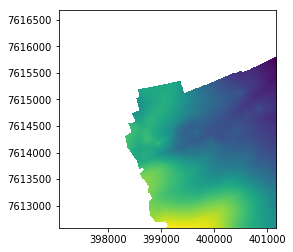

In [3]:
show(clpx12)

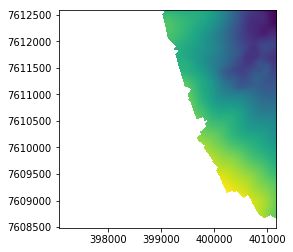

In [5]:
show(clpx13)

In [25]:
srcs = [clpx12, clpx13, clpx21,
       clpx22, clpx23, clpx31,
       clpx32, clpx33, clpx41,
        clpx41, clpx42, clpx43,
        clpx50, clpx51, clpx52]

In [26]:
arr, out_trans = merge(srcs, res=1)

In [27]:
out_trans

Affine(1.0, 0.0, 397068.0,
       0.0, -1.0, 7624870.0)

In [28]:
arr.shape

(1, 16384, 20480)

In [29]:
out_meta = clpx22.meta.copy()
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 16384,
 'nodata': -32767.0,
 'transform': Affine(0.25, 0.0, 401164.0,
       0.0, -0.25, 7616678.0),
 'width': 16384}

In [30]:
out_meta.update({"height": arr.shape[1],
                 "width": arr.shape[2],
                 "transform": out_trans})
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 16384,
 'nodata': -32767.0,
 'transform': Affine(1.0, 0.0, 397068.0,
       0.0, -1.0, 7624870.0),
 'width': 20480}

In [33]:
with rasterio.open("/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/clpx_june5_2017_DEM_nd32767.tif", "w", **out_meta) as dest:
    dest.write(arr)

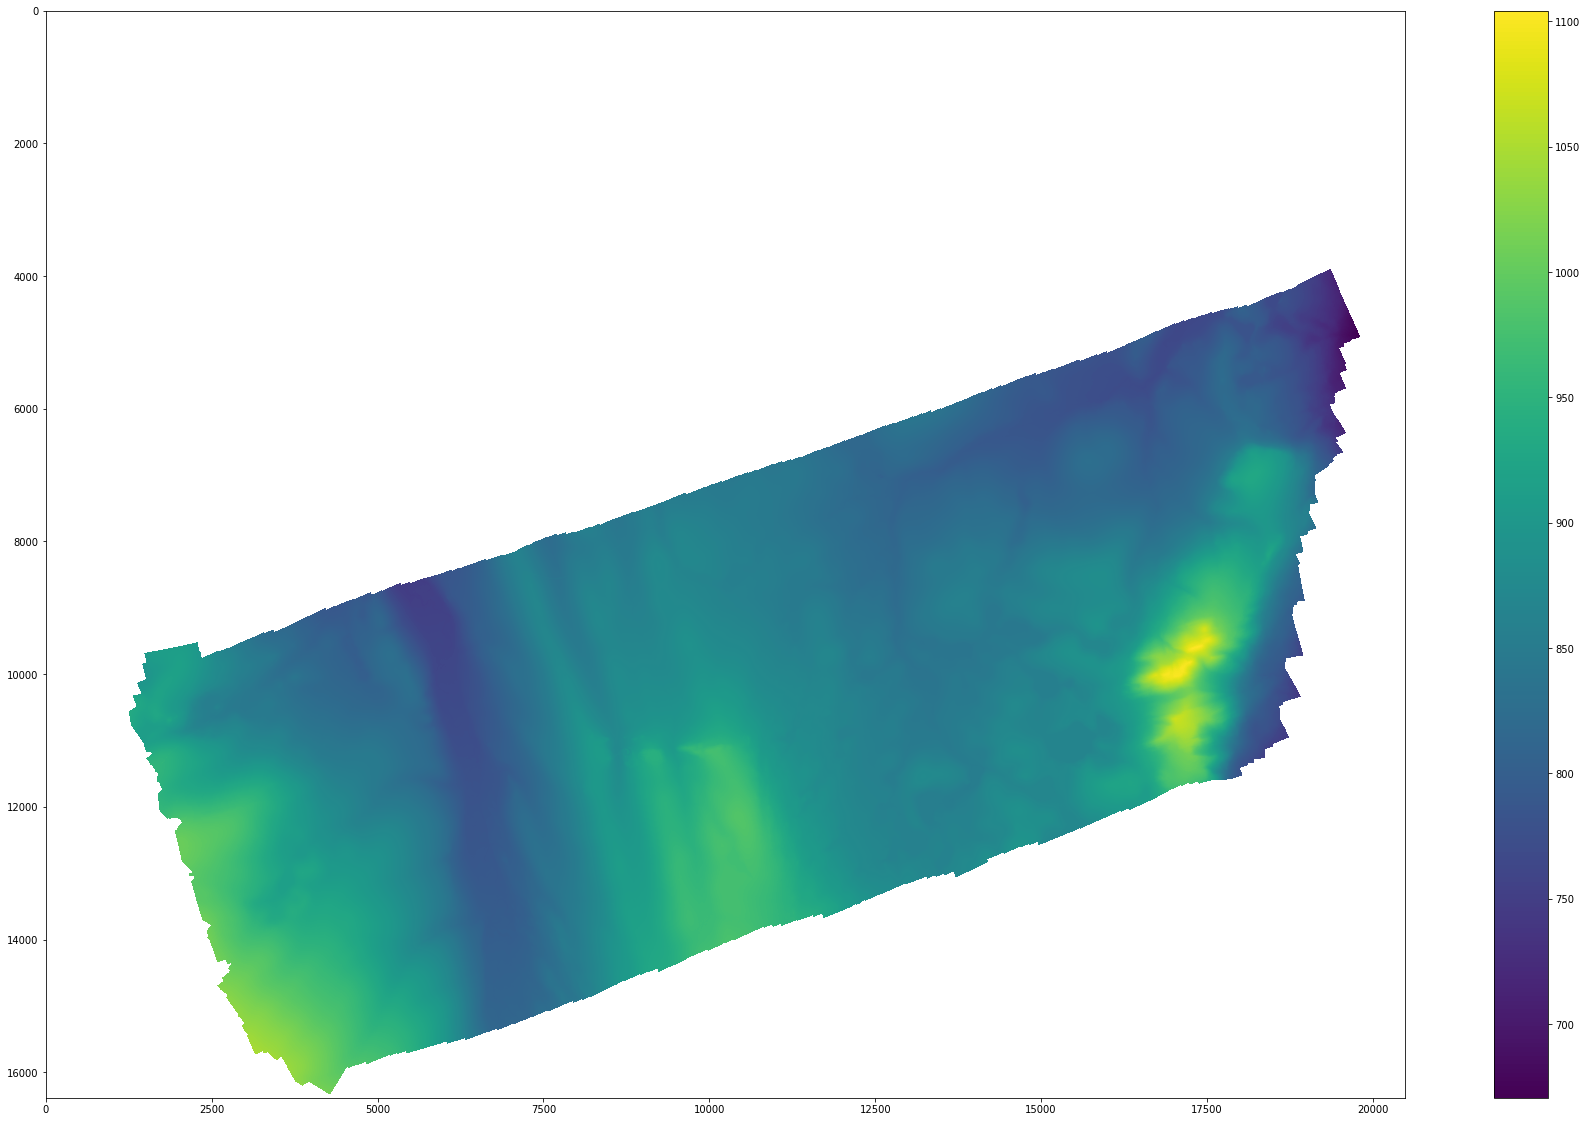

In [36]:
src = rasterio.open("/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/clpx_june5_2017_DEM_nd32767.tif")
arr = src.read(1)
arr[arr == -32767.0] = np.nan
plt.figure(figsize=(32,20))
plt.imshow(arr)
plt.colorbar()

In [41]:
arr.min()
arr.shape

(16384, 20480)

In [38]:
np.nanmin(arr)

670.58612

In [43]:
out_meta.update({"nodata": np.nan})
out_meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 16384,
 'nodata': nan,
 'transform': Affine(1.0, 0.0, 397068.0,
       0.0, -1.0, 7624870.0),
 'width': 20480}

In [47]:
with rasterio.open("/home/cparr/surfaces/level_1_surfaces/clpx/bare_earth/clpx_june5_2017_DEM.tif", "w", **out_meta) as dest:
    dest.write(arr,1)